## Data Collection


The data collection process fetches financial news data from the Stock News API for a predefined list of tickers and saves it to CSV files. It iterates through each ticker, retrieves news items in batches, and writes the data to CSV files, both for all tickers combined and for each individual ticker.

### References

1. **Requests Library**
   - Tutorial: [Python Requests Tutorial: Request Web Pages, Download Images, POST Data](https://realpython.com/python-requests/) (Accessed on April 3, 2024)
     - Reference: Stack Abuse. "Python Requests Tutorial: Request Web Pages, Download Images, POST Data." *Real Python*. Latest version. Real Python.

2. **CSV Module**
   - Tutorial: [Reading and Writing CSV Files in Python](https://realpython.com/python-csv/) (Accessed on April 3, 2024)
     - Reference: Stack Abuse. "Reading and Writing CSV Files in Python." *Real Python*. Latest version. Real Python.

3. **EOD Historical Data API**
   - Tutorial: [Getting Started with EOD Historical Data API](https://eodhistoricaldata.com/financial-apis/getting-started-python/) (Accessed on April 3, 2024)
     - Reference: EOD Historical Data. "Getting Started with EOD Historical Data API." Latest version. EOD Historical Data.

4. **yfinance Library**
   - Tutorial: [How to Get Stock Data using Python](https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/) (Accessed on April 3, 2024)
     - Reference: Learn Data Science. "How to Get Stock Data using Python." *Learn Data Sci*. Latest version. Learn Data Sci.

5. **pandas Library**
   - Tutorial: [Python Pandas Tutorial: A Complete Introduction for Beginners](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/) (Accessed on April 3, 2024)
     - Reference: Learn Data Science. "Python Pandas Tutorial: A Complete Introduction for Beginners." *Learn Data Sci*. Latest version. Learn Data Sci.

6. **os Module**
   - Tutorial: [Python OS Module: Your One-Stop Guide](https://realpython.com/python-os-module/) (Accessed on April 3, 2024)
     - Reference: Stack Abuse. "Python OS Module: Your One-Stop Guide." *Real Python*. Latest version. Real Python.


First we will try EODHD API with its historical news data plan

EODHD Results:

![alt text](./img/eodhd.png "Title")

We can see that the data is not what we want. The same set of data is returned for all tickers which wouldn't allow use to gather data for each ticker individually. Also some data entries are not properly formatted. We can still use EODHD API to collect stock prices later. 

Now let's use a different API which is Stock News API. We subscribed to their premium plan which allows us to collect historical data and make up to 50000 API calls per month.

We will collect all news articles for the 11 tickers we chose in one csv file as well as creating individual csv files for individual tickers to help us analyse the sentiment about a specific stock.

Data will be collected between the years 2022 and 2023 as the stock market was quite volatile this year which will allow us to see possible correlation between general sentiment and stock prices.

As the maximum articles per request is 100, we need to iteratively make requests for the same ticker but with a different page parameter.

In [1]:
import requests 
import csv 


api_key = 'a4bnuaw33eaonihmkflmnqklnekfxw1wskeyxcbk'  # API key for accessing the Stock News API
url = 'https://stocknewsapi.com/api/v1'  # Base URL for the API
date = "01012022-12302022"  # Date range for fetching news data
tickers_to_track = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'SPY', 'QQQ', 'JPM', 'BAC', 'GS', 'C''PG', 'META','AMD', 'NFLX', 'TSM']  # List of ticker symbols to track

# Filename for storing aggregated news data for all tickers
csv_file_name_all = 'financial_news_data_stocknewsapi_alltickers.csv'

# Creating the file to store aggregated news data for all tickers
with open(csv_file_name_all, 'w', newline='', encoding='utf-8') as csv_file_all:
    csv_writer_all = csv.writer(csv_file_all)
    csv_writer_all.writerow(['ticker', 'date', 'title', 'text', 'source', 'url', 'type', 'sentiment'])

# Iterating over each ticker to fetch news data
for ticker in tickers_to_track:

    # Filename for storing news data for individual tickers
    csv_file_name_ticker = f'financial_news_data_stocknewsapi_{ticker}.csv'

    # Creating the file to store news data for the current ticker
    with open(csv_file_name_ticker, 'w', newline='', encoding='utf-8') as csv_file_ticker:
        csv_writer_ticker = csv.writer(csv_file_ticker)
        csv_writer_ticker.writerow(['date', 'title', 'text', 'source', 'url', 'type', 'sentiment'])

    page = 1
    while True:
        
        # Parameters for the API request
        params = {
            "token": api_key,
            "tickers": ticker,
            "date": date,
            'items': '100',
            'page': page
        }

        # Sending GET request to fetch news data
        response = requests.get(url, params=params)

        # Checking if the request was successful (status code 200)
        if response.status_code == 200:
            data = response.json()

            # If there's no more data available, break the loop
            if not data['data']:
                break

            # Writing news data to the aggregated file for all tickers
            with open(csv_file_name_all, 'a', newline='', encoding='utf-8') as csv_file_all:
                csv_writer_all = csv.writer(csv_file_all)
                for news_item in data['data']:
                    csv_writer_all.writerow([ticker, news_item.get('date'), news_item.get('title'), news_item.get('text'), news_item.get('source_name'), news_item.get('news_url'), news_item.get('type'), news_item.get('sentiment')])

            # Writing news data to the file for the current ticker
            with open(csv_file_name_ticker, 'a', newline='', encoding='utf-8') as csv_file_ticker:
                csv_writer_ticker = csv.writer(csv_file_ticker)
                for news_item in data['data']:
                    csv_writer_ticker.writerow([news_item.get('date'), news_item.get('title'), news_item.get('text'), news_item.get('source_name'), news_item.get('news_url'), news_item.get('type'), news_item.get('sentiment')])

            page += 1
        else:
            # Error handling for failed API requests
            print(f"Error for {ticker}: {response.status_code} - {response.text}")
            break

# Printing confirmation message
print(f"Financial news data from Stock News API have been saved to {csv_file_name_all} and individual files for each ticker.")


Error for AAPL: 404 - {
    "news_url": "https://stocknewsapi.com",
    "image_url": "https://cdn.snapi.dev/images/v1/s/t/stocks22-1169245.jpg",
    "title": "Stock News API",
    "text": "404 Error - API Token inactive => Please visit your account page and activate your token.",
    "source_name": "Stock News API",
    "date": "Fri, 18 Feb 2022 09:24:43 -0500",
    "topics": [],
    "sentiment": "Negative",
    "type": "Article"
}
Error for GOOGL: 404 - {
    "news_url": "https://stocknewsapi.com",
    "image_url": "https://cdn.snapi.dev/images/v1/s/t/stocks22-1169245.jpg",
    "title": "Stock News API",
    "text": "404 Error - API Token inactive => Please visit your account page and activate your token.",
    "source_name": "Stock News API",
    "date": "Fri, 18 Feb 2022 09:24:43 -0500",
    "topics": [],
    "sentiment": "Negative",
    "type": "Article"
}
Error for MSFT: 404 - {
    "news_url": "https://stocknewsapi.com",
    "image_url": "https://cdn.snapi.dev/images/v1/s/t/stock

Stock News API Results

Clearly this API is much more helpful when targeting news about individual tickers. We know collected the news for each ticker, saved them to files with their corresponding ticker name, combined them together in one file. We also specified the date to be between Jan 2022 to Jan 2023. For each entry in our dataset we have the following fields:

- Date: the date the article was published
- Title: the title of the article
- Text: the body of the article
- source: the news source of this article e.g. Bloomberg, Yahoo Finance, etc.
- news_url: the article link
- type: whether this entry is a news article or a video.
- sentiment: a sentiment classification recognized by the API.

![alt text](./img/stocknews.png "Title")

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv("../financial_news/stock_news_api/financial_news_data_stocknewsapi_AAPL.csv")
df.head()

,date,title,text,source,url,type,sentiment
0,"Fri, 30 Dec 2022 19:51:00 -0500","Tesla, Apple, Southwest Airlines: Stocks That ...",Here are seven major companies whose stocks mo...,WSJ,https://www.wsj.com/articles/tesla-apple-south...,Article,Neutral
1,"Fri, 30 Dec 2022 14:52:52 -0500","Streaming ad services will have a price war, s...","Mark Douglas, MNTN Founder, joins 'The Exchang...",CNBC Television,https://www.youtube.com/watch?v=_OlMFW4QDx8,Video,Neutral
2,"Fri, 30 Dec 2022 12:31:20 -0500",Apple CEO Cook conveyed app store curb concern...,Apple Inc Chief Executive Tim Cook asked Japan...,Reuters,https://www.reuters.com/technology/apple-ceo-c...,Article,Negative
3,"Fri, 30 Dec 2022 12:29:44 -0500","Tech regulation: What to expect on privacy, an...",Yahoo Finance tech editor Dan Howley breaks do...,Yahoo Finance,https://www.youtube.com/watch?v=bKlMyTds-nE,Video,Negative
4,"Fri, 30 Dec 2022 12:24:22 -0500","Apple stock a top pick for 2023, Citi analyst ...",Yahoo Finance's Brian Sozzi discusses an analy...,Yahoo Finance,https://www.youtube.com/watch?v=_qR41zombsY,Video,Positive


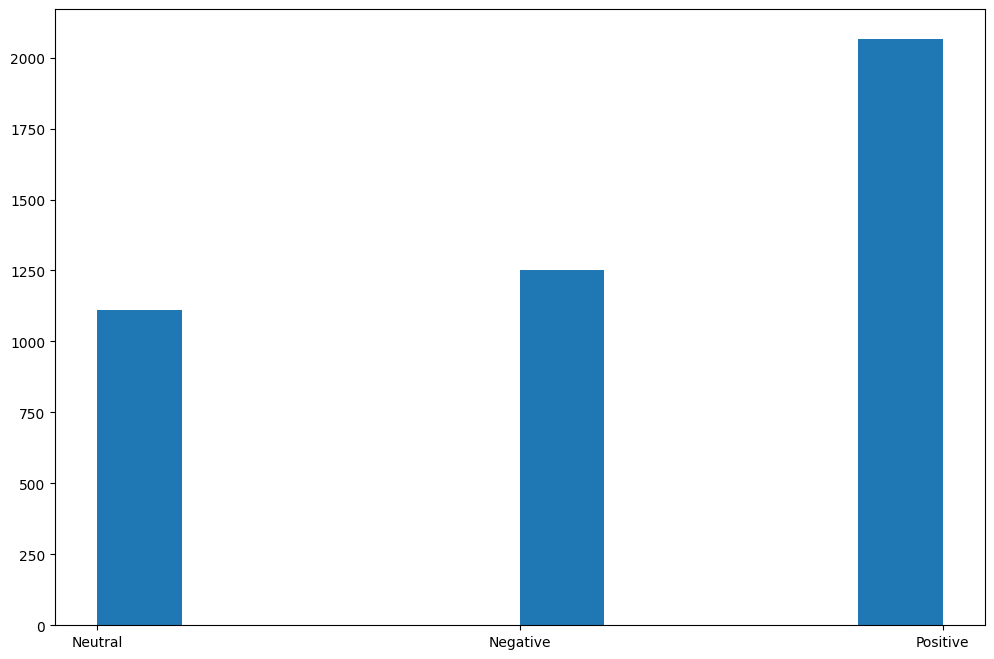

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.hist(df["sentiment"])
plt.show()

Average Text Length: 173.19571106094807
Minimum Text Length: 10
Maximum Text Length: 664


In [10]:
import pandas as pd



df = pd.read_csv("../social_media_tweets/stock_tweets.csv")

# Calculate text length for each article
df['text_length'] = df['Tweet'].apply(len)

# Calculate average text length
average_text_length = df['text_length'].mean()

# Calculate minimum text length
min_text_length = df['text_length'].min()

# Calculate maximum text length
max_text_length = df['text_length'].max()

print("Average Text Length:", average_text_length)
print("Minimum Text Length:", min_text_length)
print("Maximum Text Length:", max_text_length)


Average Text Length: 167.87250133056082
Minimum Text Length: 4
Maximum Text Length: 470


In [11]:

df = pd.read_csv("../stocktwits/stocktwits_AAPL.csv")

# Calculate text length for each article
df['text_length'] = df['message'].apply(len)

# Calculate average text length
average_text_length = df['text_length'].mean()

# Calculate minimum text length
min_text_length = df['text_length'].min()

# Calculate maximum text length
max_text_length = df['text_length'].max()

print("Average Text Length:", average_text_length)
print("Minimum Text Length:", min_text_length)
print("Maximum Text Length:", max_text_length)


Average Text Length: 93.22778532810952
Minimum Text Length: 1
Maximum Text Length: 3050
